In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import missingno as msno

%matplotlib inline

In [2]:
features = pd.read_csv('./data/features.csv')

In [3]:
stores = pd.read_csv('./data/stores.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features['Date'] = features['Date'].apply(lambda x: pd.to_datetime(x))

In [6]:
stores_features = pd.merge(features, stores, on='Store', how='outer')

In [7]:
stores_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


<AxesSubplot:>

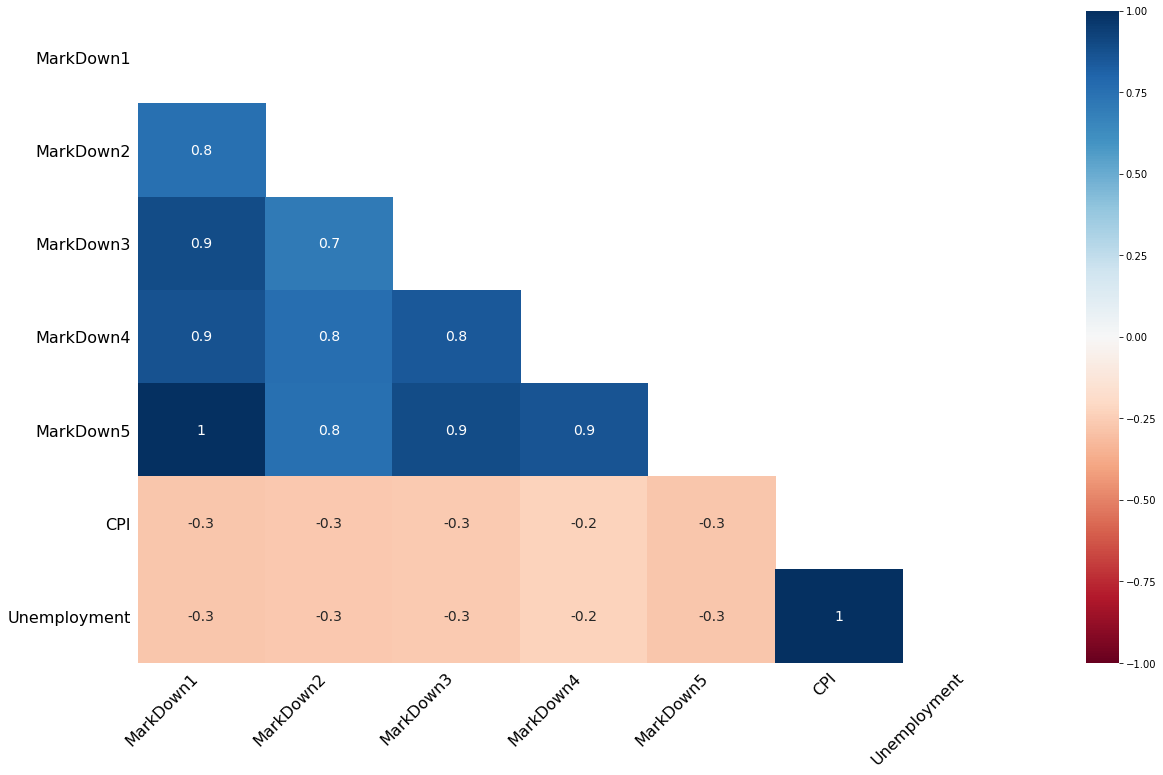

In [8]:
msno.heatmap(stores_features)

<AxesSubplot:>

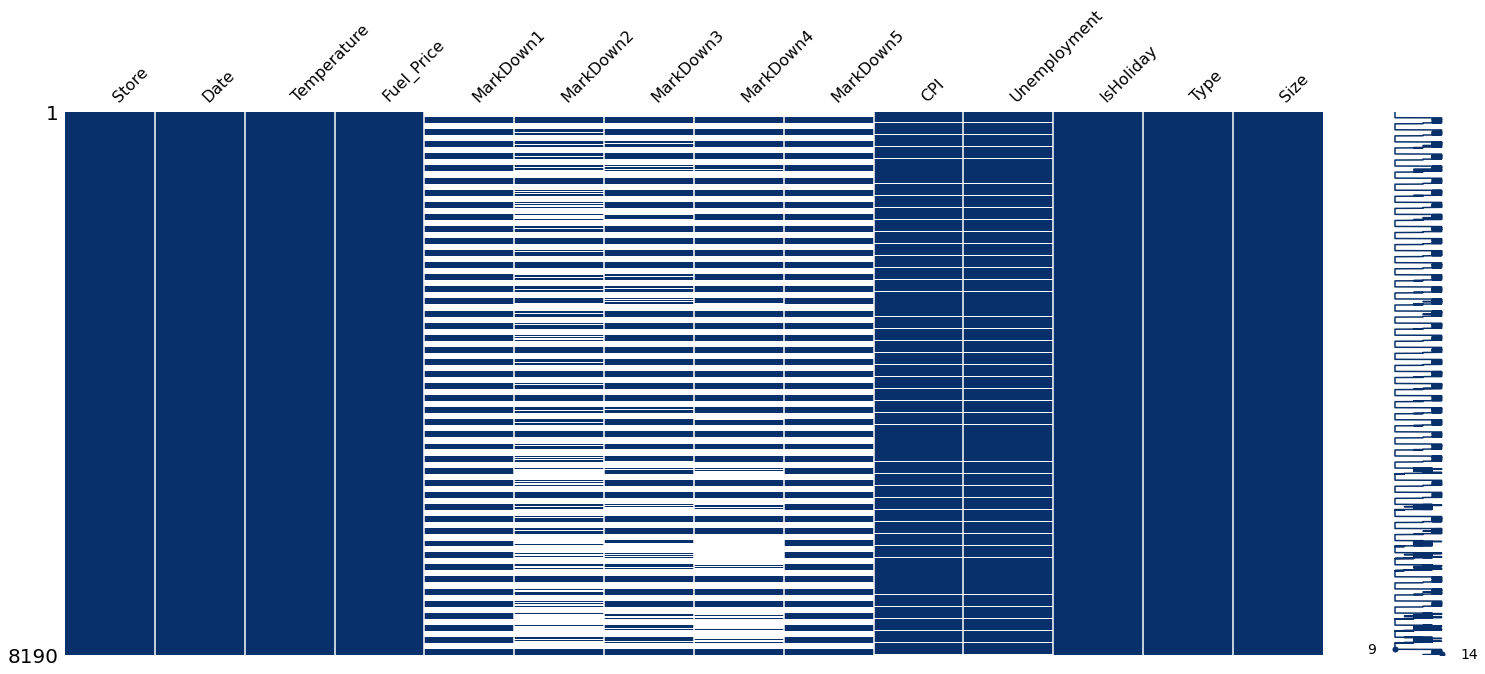

In [9]:
msno.matrix(stores_features, color=(8/255, 48/255, 107/255))

In [10]:
merged_all = pd.read_csv('./data/merged_all.csv')

In [11]:
merged_all.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Day,Month,Year,Holiday
0,0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,False,A,151315,Friday,February,2010,None
1,1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,True,A,151315,Friday,February,2010,Super Bowl
2,2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,False,A,151315,Friday,February,2010,None
3,3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,False,A,151315,Friday,February,2010,None
4,4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,False,A,151315,Friday,March,2010,None


In [12]:
merged_all_sample = merged_all[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Year']]

In [13]:
merged_all_sample = merged_all_sample.sample(frac=.0002)

In [14]:
store_sales_pivot = merged_all.pivot_table(index='Month', columns='Year', values='Weekly_Sales')

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
store_sales_pivot = store_sales_pivot.reindex(month_order, axis=0)

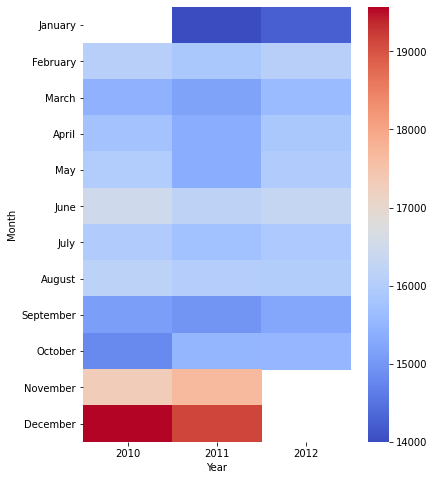

In [16]:
sales_hmp = sns.heatmap(store_sales_pivot, cmap='coolwarm').get_figure().set_size_inches(6,8)



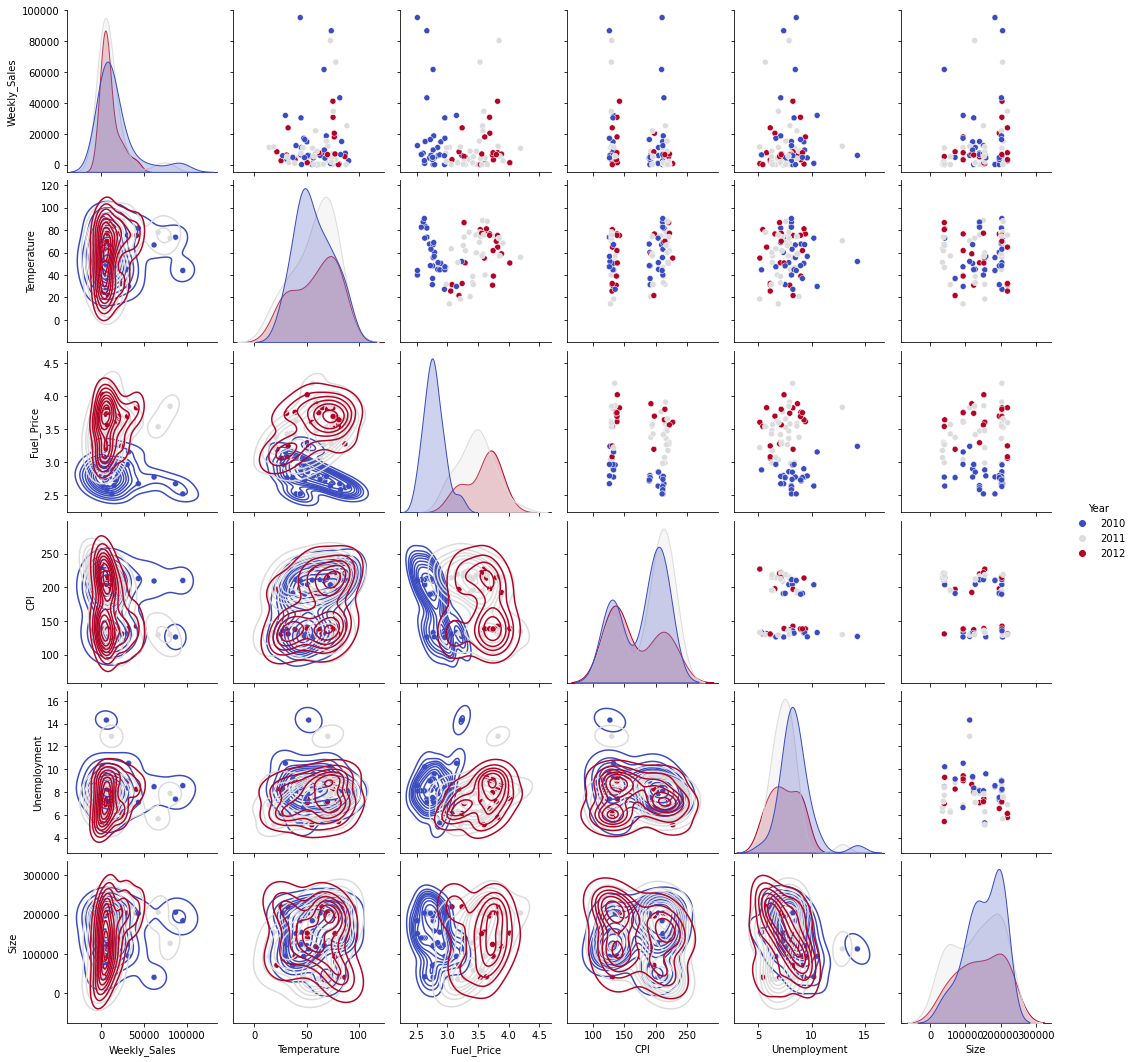

In [17]:
g = sns.pairplot(data=merged_all_sample, hue='Year', palette='coolwarm')
g.map_lower(sns.kdeplot)

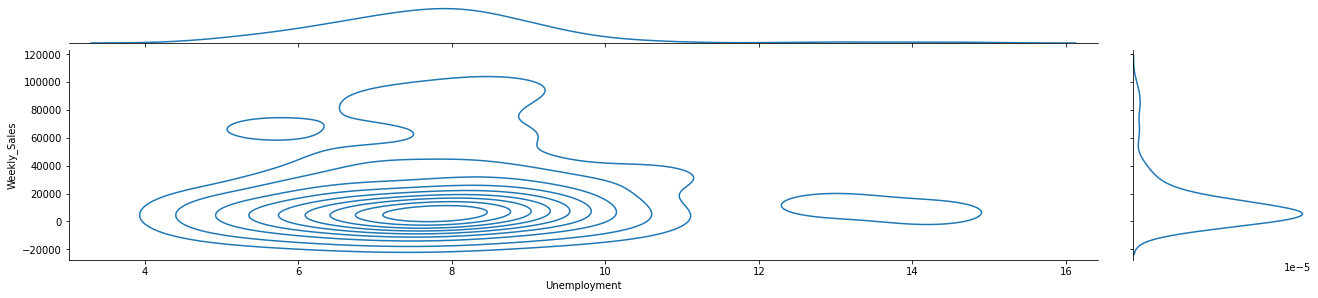

In [18]:
sns.jointplot(data=merged_all_sample, x='Unemployment', y='Weekly_Sales', kind='kde').fig.set_size_inches(20,4)

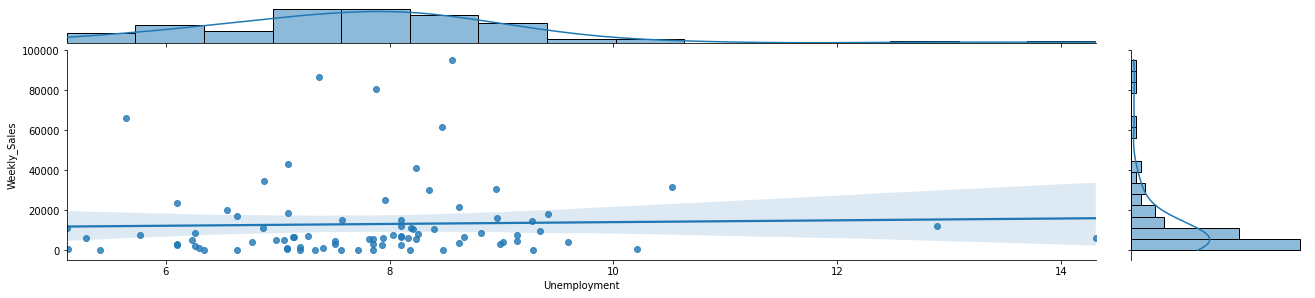

In [19]:
sns.jointplot(data=merged_all_sample, x='Unemployment', y='Weekly_Sales', kind='reg').fig.set_size_inches(20,4)

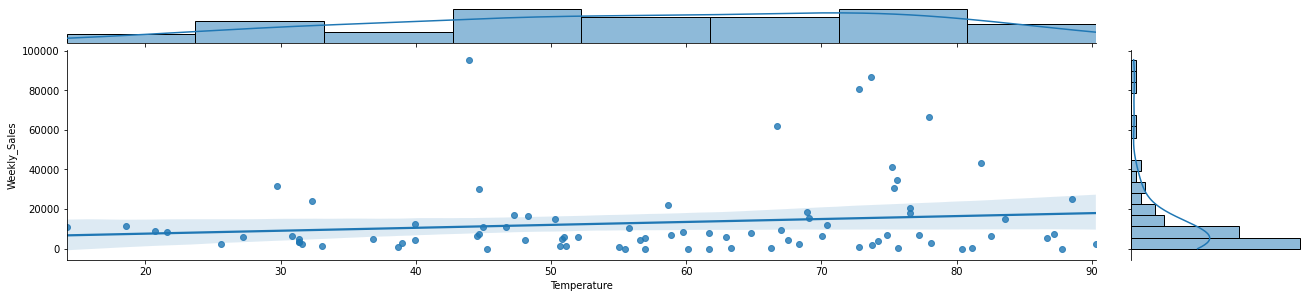

In [20]:
sns.jointplot(data=merged_all_sample, x='Temperature', y='Weekly_Sales', kind='reg').fig.set_size_inches(20,4)

Text(0.5, 1.0, 'CPI By Store')

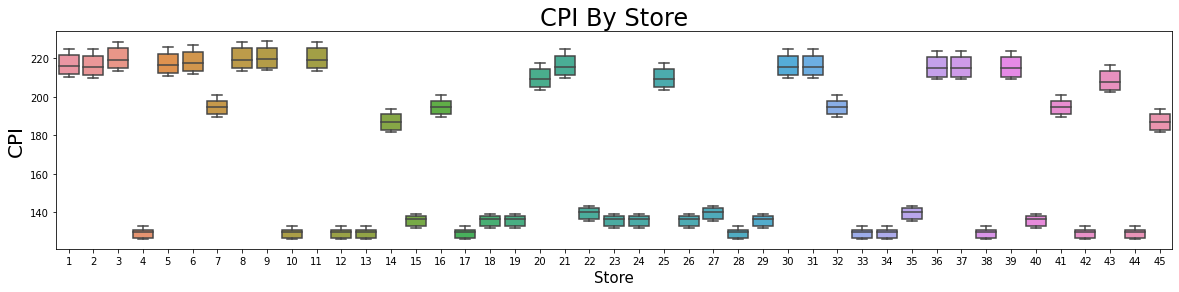

In [21]:
bp = sns.boxplot(data=features, y='CPI', x='Store')
bp.set_ylabel('CPI', fontsize=20).get_figure().set_size_inches(20,4)
bp.set_xlabel('Store', fontsize=15)
bp.set_title('CPI By Store', fontsize='24')

Text(0.5, 1.0, 'Unemployment by Store')

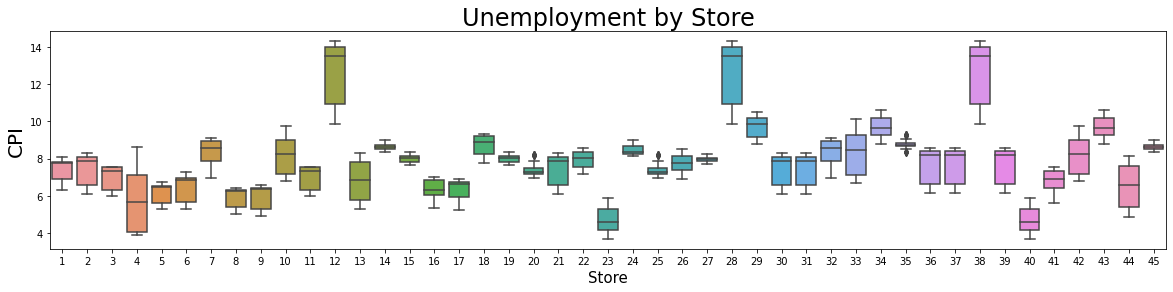

In [22]:
bp = sns.boxplot(data=features, y='Unemployment', x='Store')
bp.set_ylabel('CPI', fontsize=20).get_figure().set_size_inches(20,4)
bp.set_xlabel('Store', fontsize=15)
bp.set_title('Unemployment by Store', fontsize=24)

In [23]:
store_stats = features.groupby('Store').mean()

In [24]:
store_stats.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,,,,,,,,,,
1,66.912033,3.259242,8536.592778,3346.401918,1670.797978,3653.631444,4428.307667,217.271679,7.440994,0.071429
2,66.728407,3.259242,10395.811778,4952.891067,2314.392247,4396.779333,5961.188778,216.918640,7.403959,0.071429
3,70.394176,3.259242,3226.906333,1097.368551,1262.148205,777.115287,1153.349889,220.690122,7.006006,0.071429
4,61.416648,3.254885,10516.135556,5022.434800,2337.819886,5370.251818,6173.707667,129.197091,5.647450,0.071429
5,68.224505,3.259242,3028.673000,1186.970758,1052.037500,1033.167619,2205.375444,217.844357,6.163166,0.071429


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
store_stats = pd.DataFrame(StandardScaler().fit(store_stats).transform(store_stats), columns=store_stats.columns)

In [27]:
store_stats.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0.767489,-0.964100,0.396239,0.167362,0.028025,0.443712,0.099188,1.132776,-0.224701,-1.0
1,0.748837,-0.964100,0.876626,1.075021,0.683563,0.848181,0.612691,1.123852,-0.246270,-1.0
2,1.121190,-0.964100,-0.975681,-1.103331,-0.388208,-1.121873,-0.997896,1.219191,-0.478033,-1.0
3,0.209292,-0.992725,0.907715,1.114313,0.707425,1.378007,0.683883,-1.093666,-1.269241,-1.0
4,0.900804,-0.964100,-1.026900,-1.052706,-0.602218,-0.982513,-0.645476,1.147253,-0.968894,-1.0
